In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dropout
from keras.layers.core import Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.utils import np_utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


with open("./fer2013") as f:
    content=f.readlines()
    lines = np.array(content)
 
    num_of_instances = lines.size
print("number of instances: ",num_of_instances)

Using TensorFlow backend.


number of instances:  35918


In [15]:
import keras
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)
#configuration

x_train, y_train, x_test, y_test = [], [], [], []
# x_train chai sample ho vane
# y_train chai labels ho....important...
num_classes=7 #WE have 7 emoticons so we set 7 yo case ma..
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")
        
        
    
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1] #this data is what our CNN asks....
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print('train samples:',x_train.shape[0] )
print('test samples:',x_test.shape[0] )

#trained keras tutorial found on youtube with cnn esma detail cha


train samples: 28709
test samples: 3589


In [19]:
# we have found train sample and test sample so we can proceed now

model = Sequential() #could have done inside this parameter but add is better i guess for this situation
#three parts in CNN convolution pooling(max/avg) and then fully connected network(dense/dropout)


#1st convolution layer
model.add(Conv2D(64, (5, 5), input_shape=(48,48,1), activation='relu')) #first one must have an instance in conv2d layer
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
model.add(Flatten())#flattens into 1D tensor

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax')) #for output we use dense numclas as we have 7 labels ad sftmx for output
#first one must have an instance in conv2d layer 
#48 48 is the heght and width of image a fer 2013 describes and 1 is the color if colorful then RGB=3 incase of 1 


In [20]:
model.summary() # shape and parameter all good so ready for training and softmax activated dense is 7


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         147584    
__________

In [21]:
import keras
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])



In [22]:
batch_size=20
epochs=10

gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam(lr=.0001)
    , metrics=['accuracy']
)

fit = True

if fit == True:
    #model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
    model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
    model.load_weights('./facial_expression_model_weights.h5') #load weights
    
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1]) 

score = model.evaluate(x_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])



Epoch 1/10
20/20 [==============================] - 7s 359ms/step - loss: 1.9190 - acc: 0.2250
Epoch 2/10
20/20 [==============================] - 5s 266ms/step - loss: 1.8688 - acc: 0.2700
Epoch 3/10
20/20 [==============================] - 5s 253ms/step - loss: 1.8581 - acc: 0.2325
Epoch 4/10
20/20 [==============================] - 5s 254ms/step - loss: 1.8452 - acc: 0.2375
Epoch 5/10
20/20 [==============================] - 5s 252ms/step - loss: 1.7981 - acc: 0.2950
Epoch 6/10
20/20 [==============================] - 5s 252ms/step - loss: 1.8073 - acc: 0.2675
Epoch 7/10
20/20 [==============================] - 5s 256ms/step - loss: 1.8119 - acc: 0.2300
Epoch 8/10
20/20 [==============================] - 5s 254ms/step - loss: 1.8539 - acc: 0.2200
Epoch 9/10
20/20 [==============================] - 5s 258ms/step - loss: 1.8124 - acc: 0.2625
Epoch 10/10
20/20 [==============================] - 5s 255ms/step - loss: 1.8003 - acc: 0.2850
Train loss: 1.82486376184
Train accuracy: 25.1314

In [58]:
batch_size=256
epochs=10

gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam(lr=.0001)
    , metrics=['accuracy']
)

fit = True

if fit == True:
    #model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
    model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
    model.load_weights('./facial_expression_model_weights.h5') #load weights
    
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1]) 

score = model.evaluate(x_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])



Epoch 1/10
256/256 [==============================] - 455s 2s/step - loss: 1.8084 - acc: 0.2518
Epoch 2/10
256/256 [==============================] - 522s 2s/step - loss: 1.7522 - acc: 0.2737
Epoch 3/10
256/256 [==============================] - 530s 2s/step - loss: 1.6443 - acc: 0.3422
Epoch 4/10
256/256 [==============================] - 520s 2s/step - loss: 1.5659 - acc: 0.3860
Epoch 5/10
256/256 [==============================] - 487s 2s/step - loss: 1.5178 - acc: 0.4102
Epoch 6/10
256/256 [==============================] - 487s 2s/step - loss: 1.4741 - acc: 0.4315
Epoch 7/10
256/256 [==============================] - 471s 2s/step - loss: 1.4414 - acc: 0.4462
Epoch 8/10
256/256 [==============================] - 483s 2s/step - loss: 1.4085 - acc: 0.4596
Epoch 9/10
256/256 [==============================] - 510s 2s/step - loss: 1.3840 - acc: 0.4705
Epoch 10/10
256/256 [==============================] - 509s 2s/step - loss: 1.3571 - acc: 0.4806
Train loss: 1.37901250268
Train accurac

In [46]:
labels= next(train_generator)

In [47]:
print(labels)


(array([[[[ 0.95686275],
         [ 0.98039216],
         [ 1.        ],
         ..., 
         [ 1.        ],
         [ 1.        ],
         [ 0.95294118]],

        [[ 0.98039216],
         [ 0.8509804 ],
         [ 0.72941178],
         ..., 
         [ 0.38039216],
         [ 0.53333336],
         [ 0.97647059]],

        [[ 1.        ],
         [ 0.65098041],
         [ 0.33333334],
         ..., 
         [ 0.        ],
         [ 0.23137255],
         [ 0.98823529]],

        ..., 
        [[ 1.        ],
         [ 0.58039218],
         [ 0.        ],
         ..., 
         [ 0.        ],
         [ 0.23137255],
         [ 0.99215686]],

        [[ 0.98431373],
         [ 0.7647059 ],
         [ 0.43137255],
         ..., 
         [ 0.43921569],
         [ 0.58039218],
         [ 0.97254902]],

        [[ 0.96078432],
         [ 0.99215686],
         [ 1.        ],
         ..., 
         [ 1.        ],
         [ 1.        ],
         [ 0.95294118]]],


       [[[ 0.8705

In [48]:
gen = ImageDataGenerator()
test_generator = gen.flow(x_test, y_test, batch_size=batch_size)
test_labels=next(test_generator)
print(test_labels)

(array([[[[ 0.56470591],
         [ 0.25098041],
         [ 0.05882353],
         ..., 
         [ 0.12156863],
         [ 0.18431373],
         [ 0.13725491]],

        [[ 0.3882353 ],
         [ 0.22352941],
         [ 0.13333334],
         ..., 
         [ 0.09803922],
         [ 0.11764706],
         [ 0.11372549]],

        [[ 0.47843137],
         [ 0.24705882],
         [ 0.2       ],
         ..., 
         [ 0.09411765],
         [ 0.13725491],
         [ 0.06666667]],

        ..., 
        [[ 0.45882353],
         [ 0.40392157],
         [ 0.3882353 ],
         ..., 
         [ 0.58431375],
         [ 0.58431375],
         [ 0.58823532]],

        [[ 0.44313726],
         [ 0.36078432],
         [ 0.67450982],
         ..., 
         [ 0.56862748],
         [ 0.58039218],
         [ 0.57647061]],

        [[ 0.3764706 ],
         [ 0.51372552],
         [ 0.88627452],
         ..., 
         [ 0.58431375],
         [ 0.58823532],
         [ 0.57254905]]],


       [[[ 0.0196

In [49]:
predictions= model.predict_generator(test_generator,steps=1, verbose=0)

In [50]:
predictions

array([[ 0.12167851,  0.02362666,  0.15404083,  0.23800205,  0.17458773,
         0.11431216,  0.17375208],
       [ 0.12168675,  0.02365539,  0.15406613,  0.23782335,  0.17468435,
         0.11427087,  0.1738131 ],
       [ 0.11510243,  0.01626175,  0.1528661 ,  0.25610006,  0.17625375,
         0.10738409,  0.17603184],
       [ 0.12720856,  0.03258036,  0.15416309,  0.22242028,  0.17229433,
         0.11956016,  0.17177321],
       [ 0.12643087,  0.03139781,  0.15401572,  0.22439179,  0.17258266,
         0.11893485,  0.17224628],
       [ 0.11827309,  0.01951225,  0.15341723,  0.2473156 ,  0.17567384,
         0.11066064,  0.17514731],
       [ 0.12202902,  0.02385864,  0.15456015,  0.2372068 ,  0.17436391,
         0.11497452,  0.17300689],
       [ 0.12903085,  0.03510442,  0.15337659,  0.21825995,  0.17159946,
         0.11967935,  0.17294931],
       [ 0.12050591,  0.0223366 ,  0.15381722,  0.24093193,  0.17512986,
         0.11304041,  0.17423809],
       [ 0.12270043,  0.0249

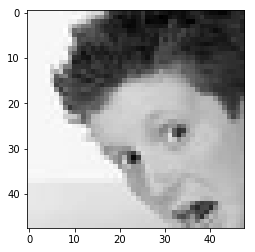

[ 0.09581087  0.01847319  0.17329325  0.03421411  0.37736422  0.06055538
  0.24028902]


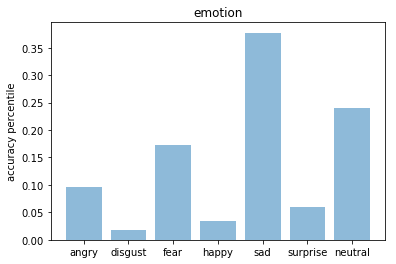

----------------------------------------------


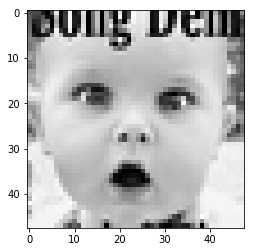

[ 0.01744858  0.00239309  0.11703113  0.00979762  0.01021854  0.83432037
  0.00879062]


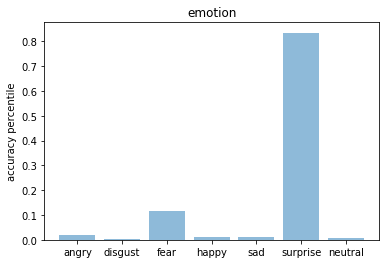

----------------------------------------------


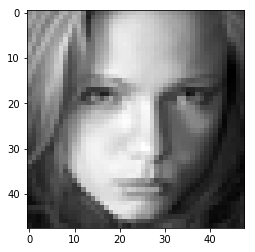

[ 0.10084527  0.01506508  0.14966407  0.05749732  0.33364415  0.03709726
  0.30618688]


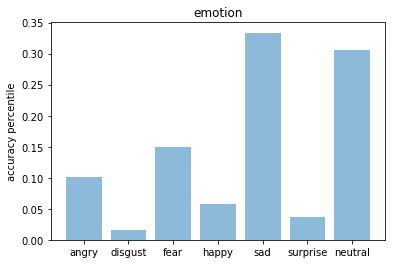

----------------------------------------------


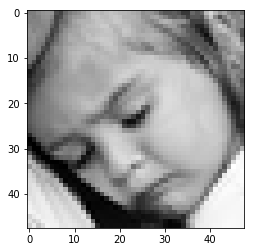

[ 0.13432465  0.01059375  0.17886598  0.08375355  0.41630086  0.03272021
  0.14344098]


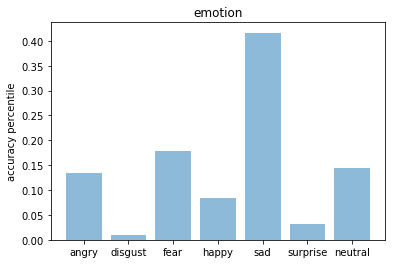

----------------------------------------------


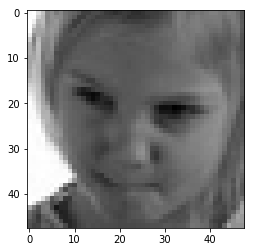

[ 0.11705126  0.01856994  0.13004678  0.08603799  0.42967042  0.01671837
  0.20190519]


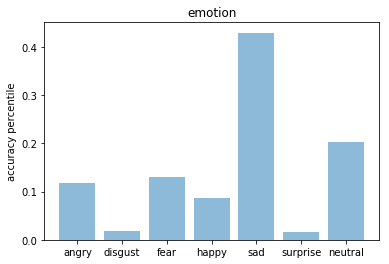

----------------------------------------------


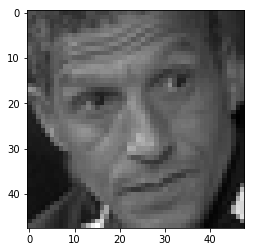

[ 0.08000249  0.01165563  0.09765311  0.07963462  0.24351442  0.02994696
  0.45759273]


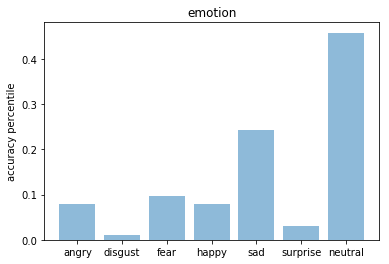

----------------------------------------------


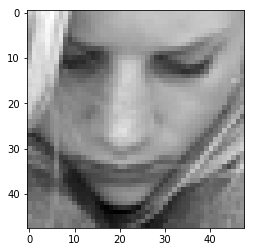

[ 0.10148257  0.02633806  0.16692817  0.08792926  0.40507862  0.02538734
  0.18685596]


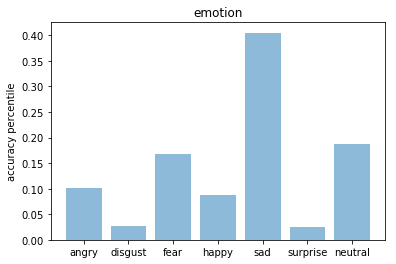

----------------------------------------------


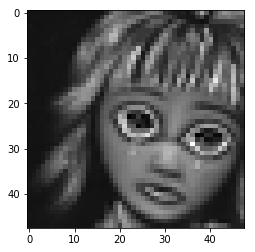

[ 0.08577788  0.00742464  0.13905309  0.13909902  0.2112149   0.05857405
  0.35885644]


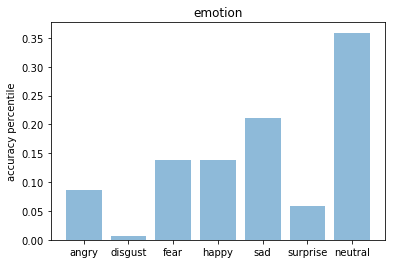

----------------------------------------------


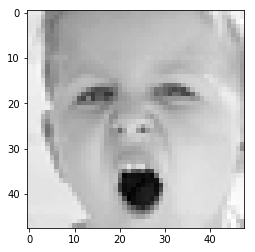

[ 0.09312209  0.01135488  0.22145849  0.0291089   0.03847878  0.59191084
  0.01456603]


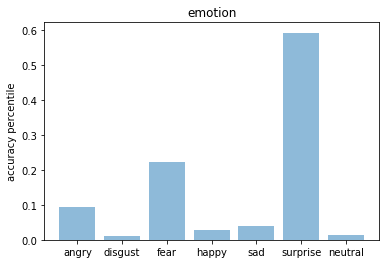

----------------------------------------------


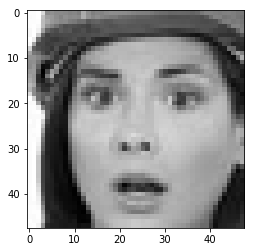

[ 0.0117969   0.00179322  0.14234251  0.00624514  0.01572569  0.79757595
  0.02452059]


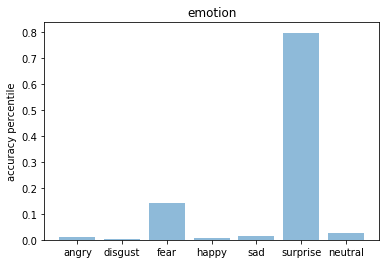

----------------------------------------------


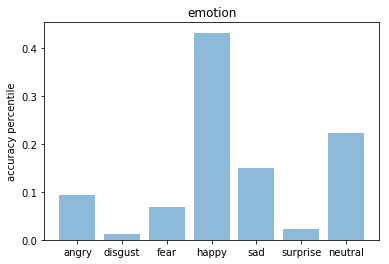

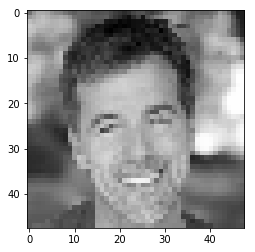

In [12]:
from IPython.display import display
from PIL import Image

def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral') #array is set accordingly
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('accuracy percentile')
    plt.title('emotion')
    plt.show()
    
    
monitor_testset_results = True

if monitor_testset_results == True:
    #make predictions for test set only if necessary
    predictions = model.predict(x_test)

    index = 0
    for i in predictions:
        if index < 30 and index >= 20:
            #print(i) #predicted scores
            #print(y_test[index]) #actual scores
            
            testing_img = np.array(x_test[index], 'float32')
            testing_img = testing_img.reshape([48, 48]);
        
            plt.gray()
            plt.imshow(testing_img)
            plt.show()
            
            print(i)
            
            emotion_analysis(i)
            print("----------------------------------------------")
        index = index + 1
 
     
img= image.load_img("./Desktop/testimg.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

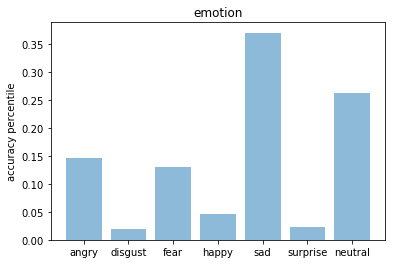

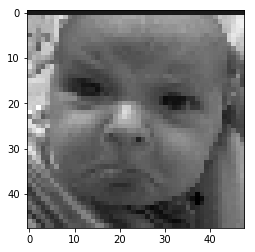

In [11]:
from IPython.display import display
from PIL import Image

def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral') #array is set accordingly
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('accuracy percentile')
    plt.title('emotion')
    plt.show()
    
    
monitor_testset_results = False

if monitor_testset_results == True:
    #make predictions for test set
    predictions = model.predict(x_test)

    index = 0
    print('hello')
    for i in predictions:
        if index < 30 and index >= 20:
            #print(i) #predicted scores
            #print(y_test[index]) #actual scores
            
            testing_img = np.array(x_test[index], 'float32')
            testing_img = testing_img.reshape([48, 48]);
        
            plt.gray()
            plt.imshow(testing_img)
            plt.show()
            
            print(i)
            
            emotion_analysis(i)
            print("----------------------------------------------")
        index = index + 1
 
     
img= image.load_img("./Desktop/testsad.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

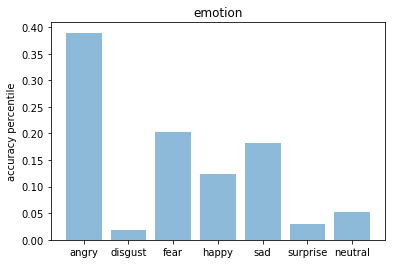

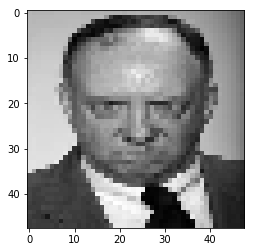

In [65]:
from IPython.display import display
from PIL import Image

def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral') #array is set accordingly
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('accuracy percentile')
    plt.title('emotion')
    plt.show()
    
    
monitor_testset_results = False

if monitor_testset_results == True:
    #make predictions for test set
    predictions = model.predict(x_test)

    index = 0
    print('hello')
    for i in predictions:
        if index < 30 and index >= 20:
            #print(i) #predicted scores
            #print(y_test[index]) #actual scores
            
            testing_img = np.array(x_test[index], 'float32')
            testing_img = testing_img.reshape([48, 48]);
        
            plt.gray()
            plt.imshow(testing_img)
            plt.show()
            
            print(i)
            
            emotion_analysis(i)
            print("----------------------------------------------")
        index = index + 1
 
     
img= image.load_img("./Desktop/testangry.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

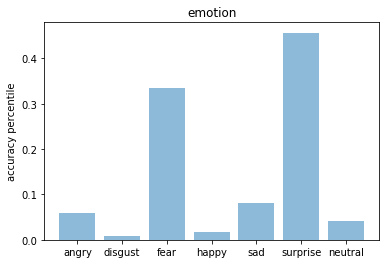

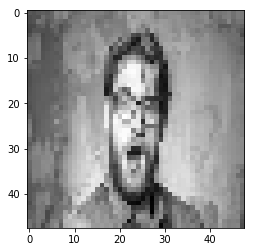

In [66]:
from IPython.display import display
from PIL import Image

def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral') #array is set accordingly
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('accuracy percentile')
    plt.title('emotion')
    plt.show()
    
    
monitor_testset_results = False

if monitor_testset_results == True:
    #make predictions for test set
    predictions = model.predict(x_test)

    index = 0
    print('hello')
    for i in predictions:
        if index < 30 and index >= 20:
            #print(i) #predicted scores
            #print(y_test[index]) #actual scores
            
            testing_img = np.array(x_test[index], 'float32')
            testing_img = testing_img.reshape([48, 48]);
        
            plt.gray()
            plt.imshow(testing_img)
            plt.show()
            
            print(i)
            
            emotion_analysis(i)
            print("----------------------------------------------")
        index = index + 1
 
     
img= image.load_img("./Desktop/testsurprise.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

In [1]:
from IPython.display import display
from PIL import Image

def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral') #array is set accordingly
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('accuracy percentile')
    plt.title('emotion')
    plt.show()
    
    
monitor_testset_results = False

if monitor_testset_results == True:
    #make predictions for test set
    predictions = model.predict(x_test)

    index = 0
    print('hello')
    for i in predictions:
        if index < 30 and index >= 20:
            #print(i) #predicted scores
            #print(y_test[index]) #actual scores
            
            testing_img = np.array(x_test[index], 'float32')
            testing_img = testing_img.reshape([48, 48]);
        
            plt.gray()
            plt.imshow(testing_img)
            plt.show()
            
            print(i)
            
            emotion_analysis(i)
            print("----------------------------------------------")
        index = index + 1
 
     
img= image.load_img("./Desktop/testsurprise.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
print(x)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);
print(x)
plt.gray()
plt.imshow(x)
plt.show()

NameError: name 'image' is not defined

In [5]:
from keras.models import load_model

#model.save('project_emotion.h5')

In [6]:
model=load_model('project_emotion.h5')

In [71]:
model.save_weights('my_model_weights.h5')

In [8]:
model.load_weights('my_model_weights.h5')